<a href="https://colab.research.google.com/github/lytvyniuk/iowa_liquor_sales-Exploratory-Data-Analysis-/blob/stage/Test_task_iowa_liquor_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

**Initial Data Cleaning**

**Top 10 stores with the most bottles sold**

In [0]:
# select aggregated data on bottles_sold and vendors
%%bigquery --project protean-genius-271221 df
SELECT vendor_number, sum(bottles_sold)  as bottles_sold FROM `bigquery-public-data.iowa_liquor_sales.sales`  group by vendor_number order by bottles_sold desc limit 10

In [0]:
# select unique names of the stores , because some stores have same name code but slight difference in names (uppercase and lowercase etc), so it is needed to group correctly
%%bigquery --project protean-genius-271221 df_names
SELECT distinct vendor_number, vendor_name FROM `bigquery-public-data.iowa_liquor_sales.sales` 

In [0]:
# merging with names
df = pd.merge(df, df_names, on = "vendor_number", how='left').drop_duplicates(subset='vendor_number', keep="first")
df


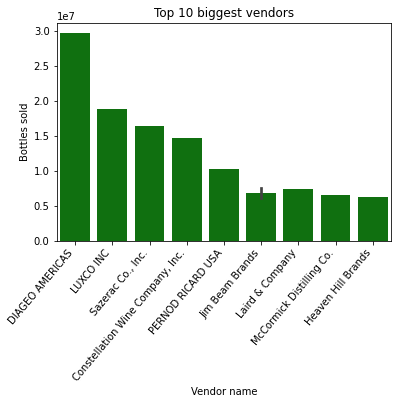

In [11]:
sns.barplot(x = 'vendor_name', y = 'bottles_sold',  data = df, color="green")
plt.xticks(rotation=50, horizontalalignment='right')
plt.xlabel("Vendor name")
plt.ylabel("Bottles sold")
plt.title("Top 10 biggest vendors")
plt.show()